In [1]:
from pathlib import Path
import pandas as pd

In [4]:
#DATA_DIR = Path('../data/movielens/ml-latest')
#RATINGS_FILEPATH = DATA_DIR / 'ratings.csv'
#MOVIES_FILPATH = DATA_DIR / 'movies.csv'

# Reading the file
dfr=pd.read_csv('ratings.csv')
#dfr
dfm=pd.read_csv('movies.csv')
dfm

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [5]:
# Creating a copy of the dataset
ratings = dfr.copy()
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [6]:
#ratings_raw = pd.read_csv(RATINGS_FILEPATH)
dfr.sample(5)

,userId,movieId,rating,timestamp
14364660,147017,3858,4.0,980793118
4854917,49815,7123,3.5,1074798219
10492928,107869,2804,3.0,1361345648
9790182,100943,5810,2.5,1227995601
17035577,174137,3615,4.0,995736025


In [7]:
# Getting the description of the dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [8]:
# Checking for null values and summing it up
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
ratings.duplicated(keep=False).sum()

0

In [17]:
# Grouping by as per the ratings

gb= ratings.groupby('rating')
gb
# the result is a dataframe group by object 

In [18]:
# Accessing the groups

for rating,rg_df in gb:
    print(rating)
    print(rg_df)

0.5
          userId  movieId  rating   timestamp
65             4       65     0.5  1115782387
66             4       66     0.5  1145937915
79             4      158     0.5  1127946524
84             4      169     0.5  1113796675
90             4      181     0.5  1127946789
...          ...      ...     ...         ...
27751875  283200     1911     0.5  1343917054
27751877  283200     2136     0.5  1343917220
27751881  283200     3087     0.5  1343917098
27752336  283206    72407     0.5  1264379328
27752686  283216    68965     0.5  1305142175

[442388 rows x 4 columns]
1.0
          userId  movieId  rating   timestamp
59             4       44     1.0  1123989796
133            4      410     1.0  1123990391
137            4      434     1.0  1113767171
185            4      788     1.0  1123990395
210            4     1091     1.0  1127946740
...          ...      ...     ...         ...
27753277  283224     1389     1.0   851002144
27753303  283226       65     1.0  1001619967

In [22]:
# Accessing specific dataframe:

gb.get_group('0.5')

KeyError: '0.5'

In [19]:
# Getting the analytics 
gb.describe()

userId                                                       \
            count           mean           std  min      25%       50%   
rating                                                                   
0.5      442388.0  141309.560336  82891.952435  4.0  69391.0  141112.0   
1.0      886233.0  142032.081077  81719.275692  4.0  71393.0  141676.0   
1.5      441354.0  142041.581914  81791.499124  1.0  71033.0  142423.0   
2.0     1850627.0  141860.674144  81609.728383  1.0  71163.0  142198.0   
2.5     1373419.0  142336.358287  81746.970168  1.0  71474.0  142088.0   
3.0     5515668.0  141997.504465  81598.776960  1.0  71622.0  141955.0   
3.5     3404360.0  142338.927274  81585.245440  1.0  71970.0  142299.0   
4.0     7394710.0  141847.542892  81682.863931  1.0  71120.0  141968.0   
4.5     2373550.0  142057.242838  81912.048381  1.0  70881.0  142342.0   
5.0     4071135.0  141581.618329  81768.968306  3.0  70346.0  141835.0   

                              movieId                ...                     \
             75%       max      count          mean  ...      75%       max   
rating                                               ...                      
0.5     213411.0  283216.0   442388.0  28011.361563  ...  48520.0  193849.0   
1.0     212370.0  283228.0   886233.0  13272.106365  ...   4720.0  193866.0   
1.5     212343.0  283222.0   441354.0  24179.577761  ...  36401.0  193841.0   
2.0     212203.0  283226.0  1850627.0  14423.453019  ...   5246.0  193882.0   
2.5     212535.0  283228.0  1373419.0  25795.741359  ...  44197.0  193886.0   
3.0     212394.0  283228.0  5515668.0  14512.026592  ...   5111.0  193876.0   
3.5     212343.0  283228.0  3404360.0  26731.828987  ...  46970.0  193855.0   
4.0     212406.0  283228.0  7394710.0  16549.200321  ...   6373.0  193886.0   
4.5     213073.0  283228.0  2373550.0  25462.051436  ...  44665.0  193868.0   
5.0     212516.0  283228.0  4071135.0  15302.556570  ...   5110.0  193874.0   

        timestamp                                                          \
            count          mean           std           min           25%   
rating                                                                      
0.5      442388.0  1.318624e+09  1.541849e+08  1.045607e+09  1.170393e+09   
1.0      886233.0  1.124369e+09  2.142708e+08  8.228736e+08  9.577810e+08   
1.5      441354.0  1.291643e+09  1.545562e+08  1.045607e+09  1.144721e+09   
2.0     1850627.0  1.142106e+09  2.099746e+08  8.231852e+08  9.705415e+08   
2.5     1373419.0  1.294893e+09  1.543808e+08  1.045607e+09  1.146964e+09   
3.0     5515668.0  1.125330e+09  2.241341e+08  7.896520e+08  9.459689e+08   
3.5     3404360.0  1.300014e+09  1.525350e+08  1.045604e+09  1.155488e+09   
4.0     7394710.0  1.166419e+09  2.178138e+08  7.896520e+08  9.747105e+08   
4.5     2373550.0  1.304061e+09  1.508125e+08  1.045605e+09  1.163989e+09   
5.0     4071135.0  1.158911e+09  2.326126e+08  7.896520e+08  9.566091e+08   

                                                  
                 50%           75%           max  
rating                                            
0.5     1.330469e+09  1.462919e+09  1.537945e+09  
1.0     1.046861e+09  1.294434e+09  1.537945e+09  
1.5     1.270484e+09  1.451084e+09  1.537944e+09  
2.0     1.092628e+09  1.312738e+09  1.537945e+09  
2.5     1.279980e+09  1.452315e+09  1.537945e+09  
3.0     1.077239e+09  1.313292e+09  1.537945e+09  
3.5     1.289683e+09  1.452029e+09  1.537945e+09  
4.0     1.132259e+09  1.376523e+09  1.537945e+09  
4.5     1.299109e+09  1.451663e+09  1.537945e+09  
5.0     1.110522e+09  1.424591e+09  1.537945e+09  

[10 rows x 24 columns]

rating
0.5    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.5    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.5    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.5    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

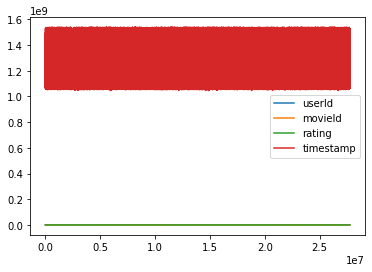

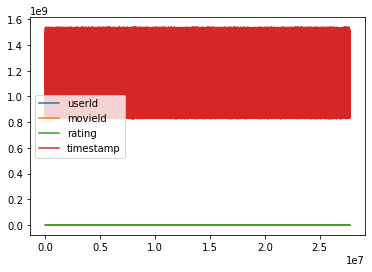

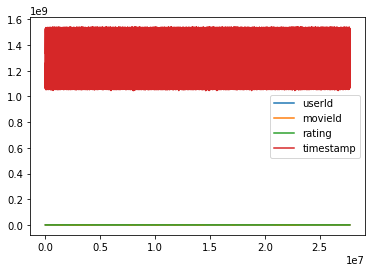

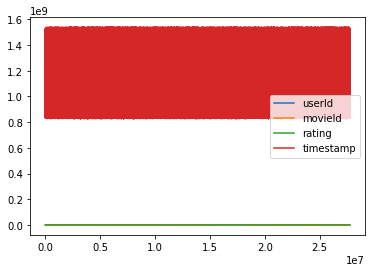

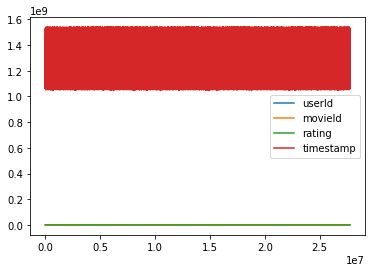

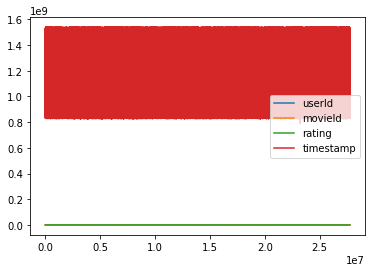

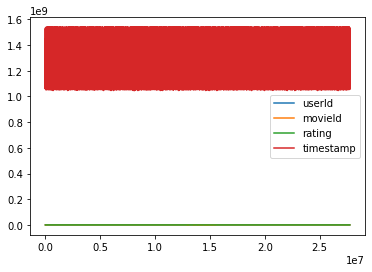

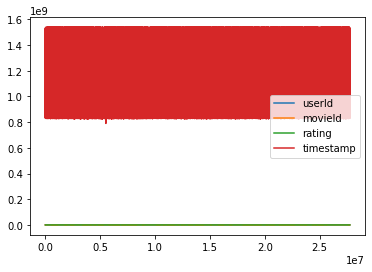

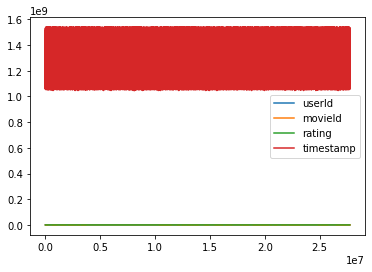

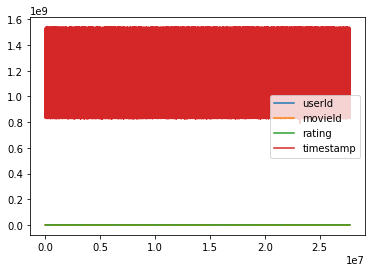

In [23]:
%matplotlib inline
gb.plot()

In [ ]:
# MOVIES:

In [24]:
# Creating a copy of the dataset
movies = dfm.copy()
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [25]:
#movies_raw = pd.read_csv(MOVIES_FILPATH)
movies.sample(5)

,movieId,title,genres
45858,166516,Robin Redbreast (1970),Drama|Horror|Mystery
15361,78034,Cemetery Junction (2010),Comedy|Drama|Romance
31383,132776,Too Much Romance... It's Time for Stuffed Pepp...,(no genres listed)
38766,150232,Bad Hair Day (2015),Adventure|Comedy
52707,181465,Dead Again in Tombstone (2017),Western


In [ ]:
movies.info()

In [37]:
# Convert genres to one hot encoding
df = pd.merge(movies, ratings)
df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,1113765937
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,948885850
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1442169375
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,1370810063
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,1237622631
...,...,...,...,...,...,...
27753439,193878,Les tribulations d'une caissière (2011),Comedy,176871,2.0,1537875080
27753440,193880,Her Name Was Mumu (2016),Drama,81710,2.0,1537886232
27753441,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330,2.0,1537890512
27753442,193886,Leal (2018),Action|Crime|Drama,206009,2.5,1537917854


In [39]:
mdf = pd.concat([df.drop('genres', axis=1), df.genres.str.get_dummies(sep='|')], axis=1)
mdf.sample(5)

KeyboardInterrupt: 

In [ ]:
movies.isnull().sum()

In [ ]:
movies.duplicated().sum()

In [26]:
# Concatenating two tables

c=pd.concat([ratings,movies])
c

# It returns a dataframe object

,userId,movieId,rating,timestamp,title,genres
0,1.0,307,3.5,1.256677e+09,NaN,NaN
1,1.0,481,3.5,1.256677e+09,NaN,NaN
2,1.0,1091,1.5,1.256677e+09,NaN,NaN
3,1.0,1257,4.5,1.256677e+09,NaN,NaN
4,1.0,1449,4.5,1.256677e+09,NaN,NaN
...,...,...,...,...,...,...
58093,NaN,193876,NaN,NaN,The Great Glinka (1946),(no genres listed)
58094,NaN,193878,NaN,NaN,Les tribulations d'une caissière (2011),Comedy
58095,NaN,193880,NaN,NaN,Her Name Was Mumu (2016),Drama
58096,NaN,193882,NaN,NaN,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [27]:
# By using the 'keys' we can differentiate the two tables 
c=pd.concat([ratings,movies],keys=['ratings','movies'])
c

userId  movieId  rating     timestamp  \
ratings 0         1.0      307     3.5  1.256677e+09   
        1         1.0      481     3.5  1.256677e+09   
        2         1.0     1091     1.5  1.256677e+09   
        3         1.0     1257     4.5  1.256677e+09   
        4         1.0     1449     4.5  1.256677e+09   
...               ...      ...     ...           ...   
movies  58093     NaN   193876     NaN           NaN   
        58094     NaN   193878     NaN           NaN   
        58095     NaN   193880     NaN           NaN   
        58096     NaN   193882     NaN           NaN   
        58097     NaN   193886     NaN           NaN   

                                                 title  \
ratings 0                                          NaN   
        1                                          NaN   
        2                                          NaN   
        3                                          NaN   
        4                                          NaN   
...                                                ...   
movies  58093                  The Great Glinka (1946)   
        58094  Les tribulations d'une caissière (2011)   
        58095                 Her Name Was Mumu (2016)   
        58096                             Flora (2017)   
        58097                              Leal (2018)   

                                      genres  
ratings 0                                NaN  
        1                                NaN  
        2                                NaN  
        3                                NaN  
        4                                NaN  
...                                      ...  
movies  58093             (no genres listed)  
        58094                         Comedy  
        58095                          Drama  
        58096  Adventure|Drama|Horror|Sci-Fi  
        58097             Action|Crime|Drama  

[27811542 rows x 6 columns]

In [28]:
movies.duplicated(subset=['title','genres']).sum()

14

In [29]:
duplicates = movies[movies.duplicated(subset=['title', 'genres'], keep=False)]
duplicates

,movieId,title,genres
2560,2644,Dracula (1931),Horror
11173,46865,Little Man (2006),Comedy
11412,48682,Offside (2006),Comedy|Drama
13504,66511,Berlin Calling (2008),Comedy|Drama
14038,70155,Seven Years Bad Luck (1921),Comedy
15637,79254,Home (2008),Drama
15902,80330,Offside (2006),Comedy|Drama
18867,93279,Darling (2007),Drama
19914,97773,"Girl, The (2012)",Drama
20835,101212,"Girl, The (2012)",Drama


In [30]:
duplicates.title.values

array(['Dracula (1931)', 'Little Man (2006)', 'Offside (2006)',
       'Berlin Calling (2008)', 'Seven Years Bad Luck (1921)',
       'Home (2008)', 'Offside (2006)', 'Darling (2007)',
       'Girl, The (2012)', 'Girl, The (2012)', 'Beneath (2013)',
       'Clear History (2013)', 'Johnny Express (2014)', 'Beneath (2013)',
       'Clear History (2013)', 'Johnny Express (2014)', 'Darling (2007)',
       'Macbeth (2015)', 'Home (2008)', 'Macbeth (2015)',
       'Seven Years Bad Luck (1921)', 'Detour (2017)',
       'Little Man (2006)', 'Lucky (2017)', 'Dracula (1931)',
       'Lucky (2017)', 'Detour (2017)', 'Berlin Calling (2008)'],
      dtype=object)

In [31]:
for movie_title in duplicates.title.unique():
    display(movies[movies.title == movie_title])

,movieId,title,genres
2560,2644,Dracula (1931),Horror
52192,180205,Dracula (1931),Horror


,movieId,title,genres
11173,46865,Little Man (2006),Comedy
48620,172427,Little Man (2006),Comedy


,movieId,title,genres
11412,48682,Offside (2006),Comedy|Drama
15902,80330,Offside (2006),Comedy|Drama


,movieId,title,genres
13504,66511,Berlin Calling (2008),Comedy|Drama
57269,191775,Berlin Calling (2008),Comedy|Drama


,movieId,title,genres
14038,70155,Seven Years Bad Luck (1921),Comedy
44387,163246,Seven Years Bad Luck (1921),Comedy


,movieId,title,genres
15637,79254,Home (2008),Drama
36172,143978,Home (2008),Drama


,movieId,title,genres
18867,93279,Darling (2007),Drama
30226,130062,Darling (2007),Drama


,movieId,title,genres
19914,97773,"Girl, The (2012)",Drama
20835,101212,"Girl, The (2012)",Drama


,movieId,title,genres
21655,104035,Beneath (2013),Horror
25046,115777,Beneath (2013),Horror


,movieId,title,genres
21691,104155,Clear History (2013),Comedy
27572,122940,Clear History (2013),Comedy


,movieId,title,genres
23834,111519,Johnny Express (2014),Animation|Comedy|Sci-Fi
29852,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi


,movieId,title,genres
33001,136564,Macbeth (2015),Drama
38804,150310,Macbeth (2015),Drama


,movieId,title,genres
46904,168774,Detour (2017),Thriller
52795,181655,Detour (2017),Thriller


,movieId,title,genres
51339,178401,Lucky (2017),Drama
52644,181329,Lucky (2017),Drama


In [32]:
nb_ratings_to_drop = 0
for movie_id in duplicates.movieId.values:
    nb_ratings_to_drop += (ratings.movieId == movie_id).sum()
nb_ratings_to_drop

3762

In [33]:
movies.title.duplicated().sum()

78

In [34]:
movies[movies.title.duplicated(keep=False)]

,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
823,838,Emma (1996),Comedy|Drama|Romance
1716,1788,Men with Guns (1997),Action|Drama
2560,2644,Dracula (1931),Horror
2766,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
...,...,...,...
57269,191775,Berlin Calling (2008),Comedy|Drama
57305,191867,Let There Be Light (2017),Documentary
57361,192003,Journey to the Center of the Earth (2008),Action|Adventure|Fantasy|Sci-Fi
57463,192243,Contact (1992),Drama|Horror|Mystery|Thriller


In [35]:
movies[movies.title=='Aladdin (1992)']

,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
24657,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy
